<a href="https://colab.research.google.com/github/salsayek/Adaptive-learning-at-universities/blob/main/ML_Project_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Mount google drive
from google.colab import drive
import pandas as pd
import os

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#path to the dataset
base_path = '/content/drive/My Drive/ML project/Dataset/'

In [ ]:
#We use try to catch errors if the path is wrong
try:
    student_info = pd.read_csv(os.path.join(base_path, 'studentInfo.csv'))
    print("Data loaded.")

    display(student_info.head())

    #basic stats
    print("\nDataset Info:")
    print(student_info.info())

except FileNotFoundError:
    print("Error: file not found. Check your folder path in 'base_path'.")

Data loaded.


,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB
None


In [ ]:
import pandas as pd
import numpy as np

base_path = '/content/drive/My Drive/ML project/Dataset/'

#Loading student info (demographics+target)
studentInfo = pd.read_csv(base_path + 'studentInfo.csv')

#Loading assessment scores (grades)
studentAssess = pd.read_csv(base_path + 'studentAssessment.csv')

#loading click logs (Interaction)
studentVle = pd.read_csv(base_path + 'studentVle.csv')

print("Files loaded successfully")

Files loaded successfully


In [ ]:
# creating a new column 'is_at_risk'
# If result is fail or withdrawn, set to 1 or 0
studentInfo['is_at_risk'] = studentInfo['final_result'].apply(
    lambda x: 1 if x in ['Fail', 'Withdrawn'] else 0
)

# Checking the distribution how many passed or failed
print(studentInfo['is_at_risk'].value_counts(normalize=True))

is_at_risk
1    0.527966
0    0.472034
Name: proportion, dtype: float64


In [ ]:
# Group by student, course and semester then sum the clicks
total_clicks = studentVle.groupby(['code_module', 'code_presentation', 'id_student'])['sum_click'].sum().reset_index()

#rename the column
total_clicks.rename(columns={'sum_click': 'total_clicks'}, inplace=True)

print(total_clicks.head())

  code_module code_presentation  id_student  total_clicks
0         AAA             2013J       11391           934
1         AAA             2013J       28400          1435
2         AAA             2013J       30268           281
3         AAA             2013J       31604          2158
4         AAA             2013J       32885          1034


In [ ]:
# Calculate average score per student
avg_scores = studentAssess.groupby('id_student')['score'].mean().reset_index()

avg_scores.rename(columns={'score': 'avg_score'}, inplace=True)
print(avg_scores.head())

   id_student  avg_score
0        6516  61.800000
1        8462  87.000000
2       11391  82.000000
3       23629  82.500000
4       23698  74.444444


In [ ]:
# Starting with demographics (studentInfo)
df_final = studentInfo.copy()

#Adding clicks (Merge on student, module, and presentation)
df_final = pd.merge(df_final, total_clicks,
                    on=['code_module', 'code_presentation', 'id_student'],
                    how='left')

# add grades (Merge on student ID)
df_final = pd.merge(df_final, avg_scores,
                    on='id_student',
                    how='left')

#Filling missing values (NaN)
# If a student has NaN for clicks or grades, it means they did nothing and we replace NaN with 0
df_final['total_clicks'] = df_final['total_clicks'].fillna(0)
df_final['avg_score'] = df_final['avg_score'].fillna(0)

# droping columns we don't need for ML right now
# We remove the original text target and student ID (ID is not a feature)
cols_to_drop = ['id_student', 'final_result']
# we will keep 'code_module' if you want to One-Hot Encode it later

print("Final dataset shape:", df_final.shape)
display(df_final.head())

Final dataset shape: (32593, 15)


,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,is_at_risk,total_clicks,avg_score
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,0,934.0,82.0
1,AAA,2013J,28400,F,Scotland,HE Qualification,20-30%,35-55,0,60,N,Pass,0,1435.0,66.4
2,AAA,2013J,30268,F,North Western Region,A Level or Equivalent,30-40%,35-55,0,60,Y,Withdrawn,1,281.0,0.0
3,AAA,2013J,31604,F,South East Region,A Level or Equivalent,50-60%,35-55,0,60,N,Pass,0,2158.0,76.0
4,AAA,2013J,32885,F,West Midlands Region,Lower Than A Level,50-60%,0-35,0,60,N,Pass,0,1034.0,54.4


In [ ]:
# Save to CSV
output_path = base_path + 'cleaned_data_v1.csv'
df_final.to_csv(output_path, index=False)
print(f"Saved cleaned data to: {output_path}")

Saved cleaned data to: /content/drive/My Drive/ML project/Dataset/cleaned_data_v1.csv


In [ ]:
# final preprocessing (Dropping IMD Band)

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

df = pd.read_csv(base_path + 'cleaned_data_v1.csv')

# We drop ID (not a feature), Final result (old target), and IMD_BAND (Bias/error prone)
cols_to_drop = ['id_student', 'final_result', 'imd_band']
df = df.drop(columns=[c for c in cols_to_drop if c in df.columns])

print("IMD Band removed for ethical/technical reasons.")

# ORDINAL encoding (Education and age)
# Corrected map based on our previous findings
education_map = {
    'No Formal quals': 0,
    'Lower Than A Level': 1,
    'A Level or Equivalent': 2,
    'HE Qualification': 3,
    'Post Graduate Qualification': 4
}
df['highest_education_encoded'] = df['highest_education'].map(education_map)

age_map = {
    '0-35': 0,
    '35-55': 1,
    '55<=': 2
}
df['age_band_encoded'] = df['age_band'].map(age_map)

# Droping old text columns
df = df.drop(columns=['highest_education', 'age_band'])

# ONE-HOT ENCODING (Gender, region, disability, course)
#this handles all remaining text columns automatically
categorical_cols = df.select_dtypes(include=['object']).columns
df_processed = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

#SPLIT
X = df_processed.drop('is_at_risk', axis=1)
y = df_processed['is_at_risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#SCALE
scaler = StandardScaler()

# we scale only the numerical features.
# We do not include the One-Hot variables (0/1) as they don't need scaling
# We include our new encoded columns (Education/Age) and the behavior stats.
num_cols = ['total_clicks', 'avg_score', 'num_of_prev_attempts',
            'highest_education_encoded', 'age_band_encoded']

#only scale columns that actually exist
real_num_cols = [c for c in num_cols if c in X_train.columns]

X_train[real_num_cols] = scaler.fit_transform(X_train[real_num_cols])
X_test[real_num_cols] = scaler.transform(X_test[real_num_cols])

X_train.to_csv(base_path + 'X_train.csv', index=False)
X_test.to_csv(base_path + 'X_test.csv', index=False)
y_train.to_csv(base_path + 'y_train.csv', index=False)
y_test.to_csv(base_path + 'y_test.csv', index=False)

print("\n preprocessing complete. Data is clean and bias free.")

IMD Band removed for ethical/technical reasons.

 preprocessing complete. Data is clean and bias free.


In [ ]:
# Select columns that are still text (object type)
categorical_cols = df.select_dtypes(include=['object']).columns
print(f"Encoding the following columns: {list(categorical_cols)}")

# Apply One-Hot encoding
df_processed = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("One-Hot Encoding complete")
display(df_processed.head())

Encoding the following columns: ['code_module', 'code_presentation', 'gender', 'region', 'disability']
One-Hot Encoding complete


,num_of_prev_attempts,studied_credits,is_at_risk,total_clicks,avg_score,highest_education_encoded,age_band_encoded,code_module_BBB,code_module_CCC,code_module_DDD,...,region_North Region,region_North Western Region,region_Scotland,region_South East Region,region_South Region,region_South West Region,region_Wales,region_West Midlands Region,region_Yorkshire Region,disability_Y
0,0,240,0,934.0,82.0,3,2,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0,60,0,1435.0,66.4,3,1,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,0,60,1,281.0,0.0,2,1,False,False,False,...,False,True,False,False,False,False,False,False,False,True
3,0,60,0,2158.0,76.0,2,1,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,0,60,0,1034.0,54.4,1,0,False,False,False,...,False,False,False,False,False,False,False,True,False,False


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Separate features (X) and target (y)
X = df_processed.drop('is_at_risk', axis=1) # All columns except the target
y = df_processed['is_at_risk']# Only the target

# Split into train (80%) and test (20%)
# random_state=42 ensures you get the same result every time (good for reproducibility)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Scale numerical features
# We fit the scaler only on the training data to avoid "Data Leakage"
scaler = StandardScaler()

# Identify numerical columns (clicks, scores, attempts..)
# We exclude the binary dummy variables we just created (0/1 don't need scaling)
num_cols = ['total_clicks', 'avg_score', 'num_of_prev_attempts']

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (26074, 29)
Testing data shape: (6519, 29)


In [ ]:
# Save the processed arrays
X_train.to_csv(base_path + 'X_train.csv', index=False)
X_test.to_csv(base_path + 'X_test.csv', index=False)
y_train.to_csv(base_path + 'y_train.csv', index=False)
y_test.to_csv(base_path + 'y_test.csv', index=False)

print("Data preprocessing complete. Files saved.")

Data preprocessing complete. Files saved.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

base_path = '/content/drive/My Drive/ML project/Dataset/'

X_train = pd.read_csv(base_path + 'X_train.csv')
X_test = pd.read_csv(base_path + 'X_test.csv')
y_train = pd.read_csv(base_path + 'y_train.csv').values.ravel() #.ravel() converts it to a flat array
y_test = pd.read_csv(base_path + 'y_test.csv').values.ravel()

print("Data loaded. Ready to train.")

Data loaded. Ready to train.


In [ ]:
#Initialize the model
# max_iter=1000 ensures the math has enough time to converge to a solution
log_reg = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

# Train the model
print("Training logistic regression")
log_reg.fit(X_train, y_train)

#Predict on test data
y_pred_log = log_reg.predict(X_test)
y_prob_log = log_reg.predict_proba(X_test)[:, 1]#Probability score (0 to 1)

print("Logistic regression training complete.")

Training logistic regression
Logistic regression training complete.


In [ ]:
# Checking which column has missing values in X_train
print(X_train.isnull().sum()[X_train.isnull().sum() > 0])

Series([], dtype: int64)


In [ ]:
# n_estimators=100 means we build 100 trees
rf_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

#Training the model
print("training random forest")
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

print("Random Forest training complete")

training random forest
Random Forest training complete


 Logistic Regression Performance 
Accuracy: 0.8319
ROC-AUC: 0.9176

Classification report:
              precision    recall  f1-score   support

           0       0.80      0.85      0.82      3051
           1       0.86      0.82      0.84      3468

    accuracy                           0.83      6519
   macro avg       0.83      0.83      0.83      6519
weighted avg       0.83      0.83      0.83      6519



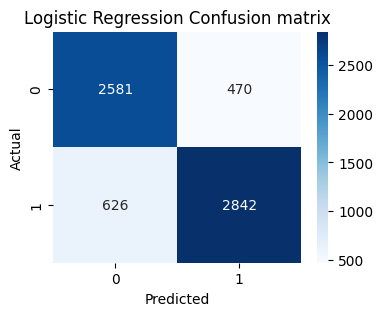

 Random Forest Performance 
Accuracy: 0.8458
ROC-AUC: 0.9279

Classification report:
              precision    recall  f1-score   support

           0       0.81      0.87      0.84      3051
           1       0.88      0.82      0.85      3468

    accuracy                           0.85      6519
   macro avg       0.85      0.85      0.85      6519
weighted avg       0.85      0.85      0.85      6519



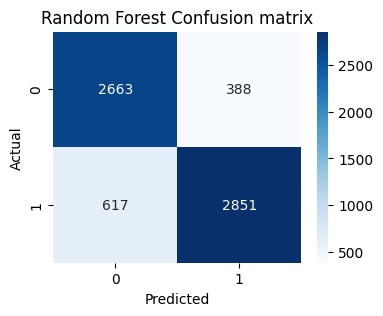

In [ ]:
def evaluate_model(name, y_true, y_pred, y_prob):
    print(f" {name} Performance ")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"ROC-AUC: {roc_auc_score(y_true, y_prob):.4f}")
    print("\nClassification report:")
    print(classification_report(y_true, y_pred))

    # Plot confusion matrix
    plt.figure(figsize=(4, 3))
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Run evaluation for both
evaluate_model("Logistic Regression", y_test, y_pred_log, y_prob_log)
evaluate_model("Random Forest", y_test, y_pred_rf, y_prob_rf)

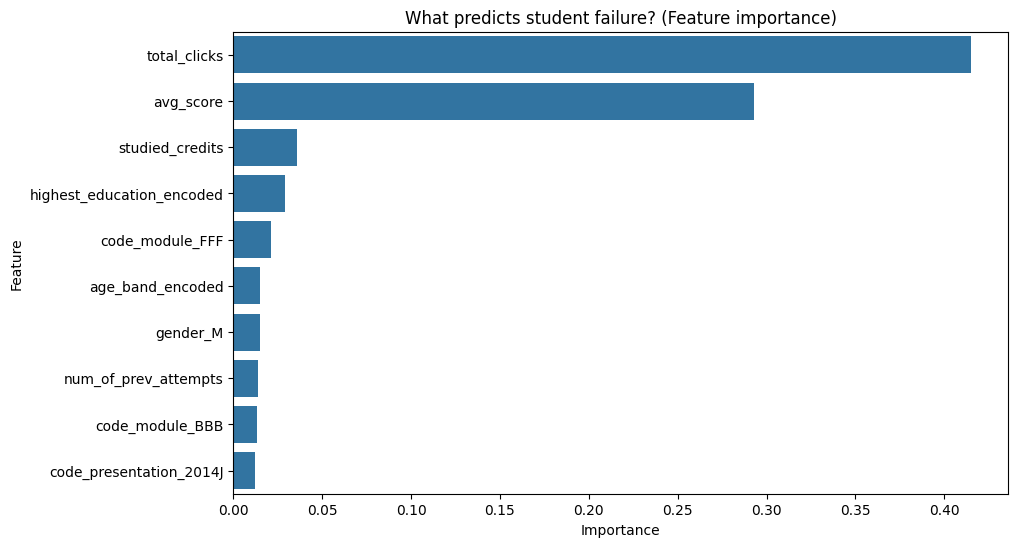

In [ ]:
# Get feature importance
importances = rf_model.feature_importances_
feature_names = X_train.columns

#create a dataframe for plotting
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot top 10 features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(10))
plt.title('What predicts student failure? (Feature importance)')
plt.show()

In [ ]:
import joblib

#Save the Trained Model
joblib.dump(rf_model, base_path + 'random_forest_model.pkl')

#Save the scaler
joblib.dump(scaler, base_path + 'scaler.pkl')

#Save the column names to ensure the app puts data in the right order
joblib.dump(X_train.columns, base_path + 'model_columns.pkl')

print("Model, scaler, and columns saved to google drive.")

Model, scaler, and columns saved to google drive.
